In [5]:
#       !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="hmWwD633kHXznyTfDqQS")
# project = rf.workspace("masterarbeit-d3frz").project("r-s_5k")
# version = project.version(5)
# dataset = version.download("yolov8")

In [ ]:
!nvidia-smi

Mon Jul 15 04:17:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
#  predict using the yolov8n model
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/R+S_5k-5/test/images/bccd4f82-5c8f9f28_jpg.rf.382b01ca5962950db91753b8326568fa.jpg' save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/R+S_5k-5/test/images/bccd4f82-5c8f9f28_jpg.rf.382b01ca5962950db91753b8326568fa.jpg: 640x640 2 persons, 2 cars, 1 bus, 3 trucks, 11.1ms
Speed: 5.1ms preprocess, 11.1ms inference, 553.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


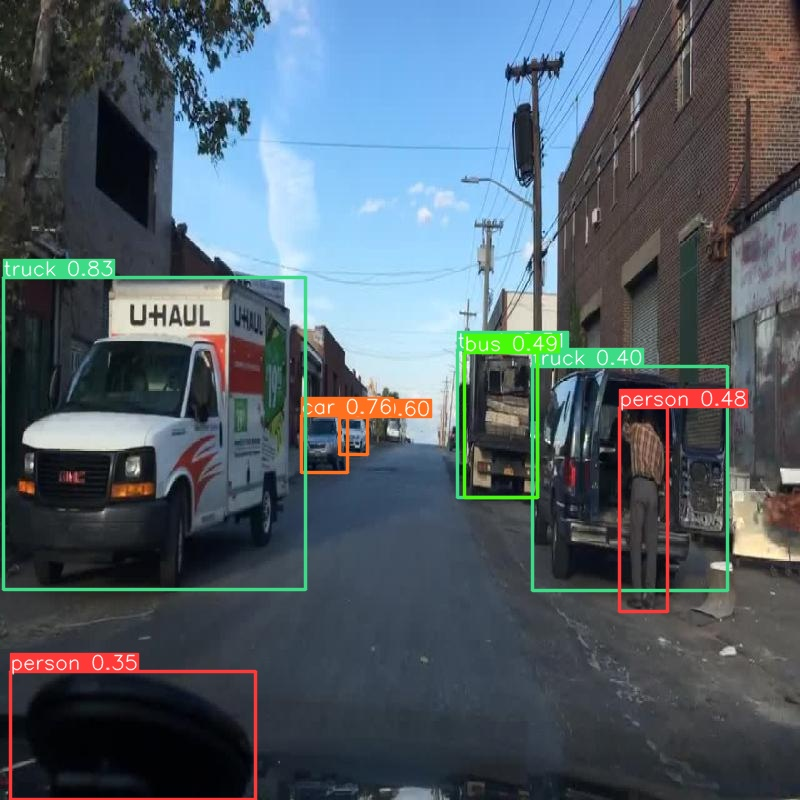

In [ ]:
# showing the image predicted by yolov8
Image(filename='/content/runs/detect/predict2/bccd4f82-5c8f9f28_jpg.rf.382b01ca5962950db91753b8326568fa.jpg', height=600)

In [ ]:
# trainning the model with custom datase for 20 epochs

!yolo task=detect mode=train model=yolov8l.pt data=/content/R+S_5k-5/data.yaml epochs=20 imgsz=500 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.57 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/R+S_5k-5/data.yaml, epochs=20, patience=50, batch=16, imgsz=500, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=

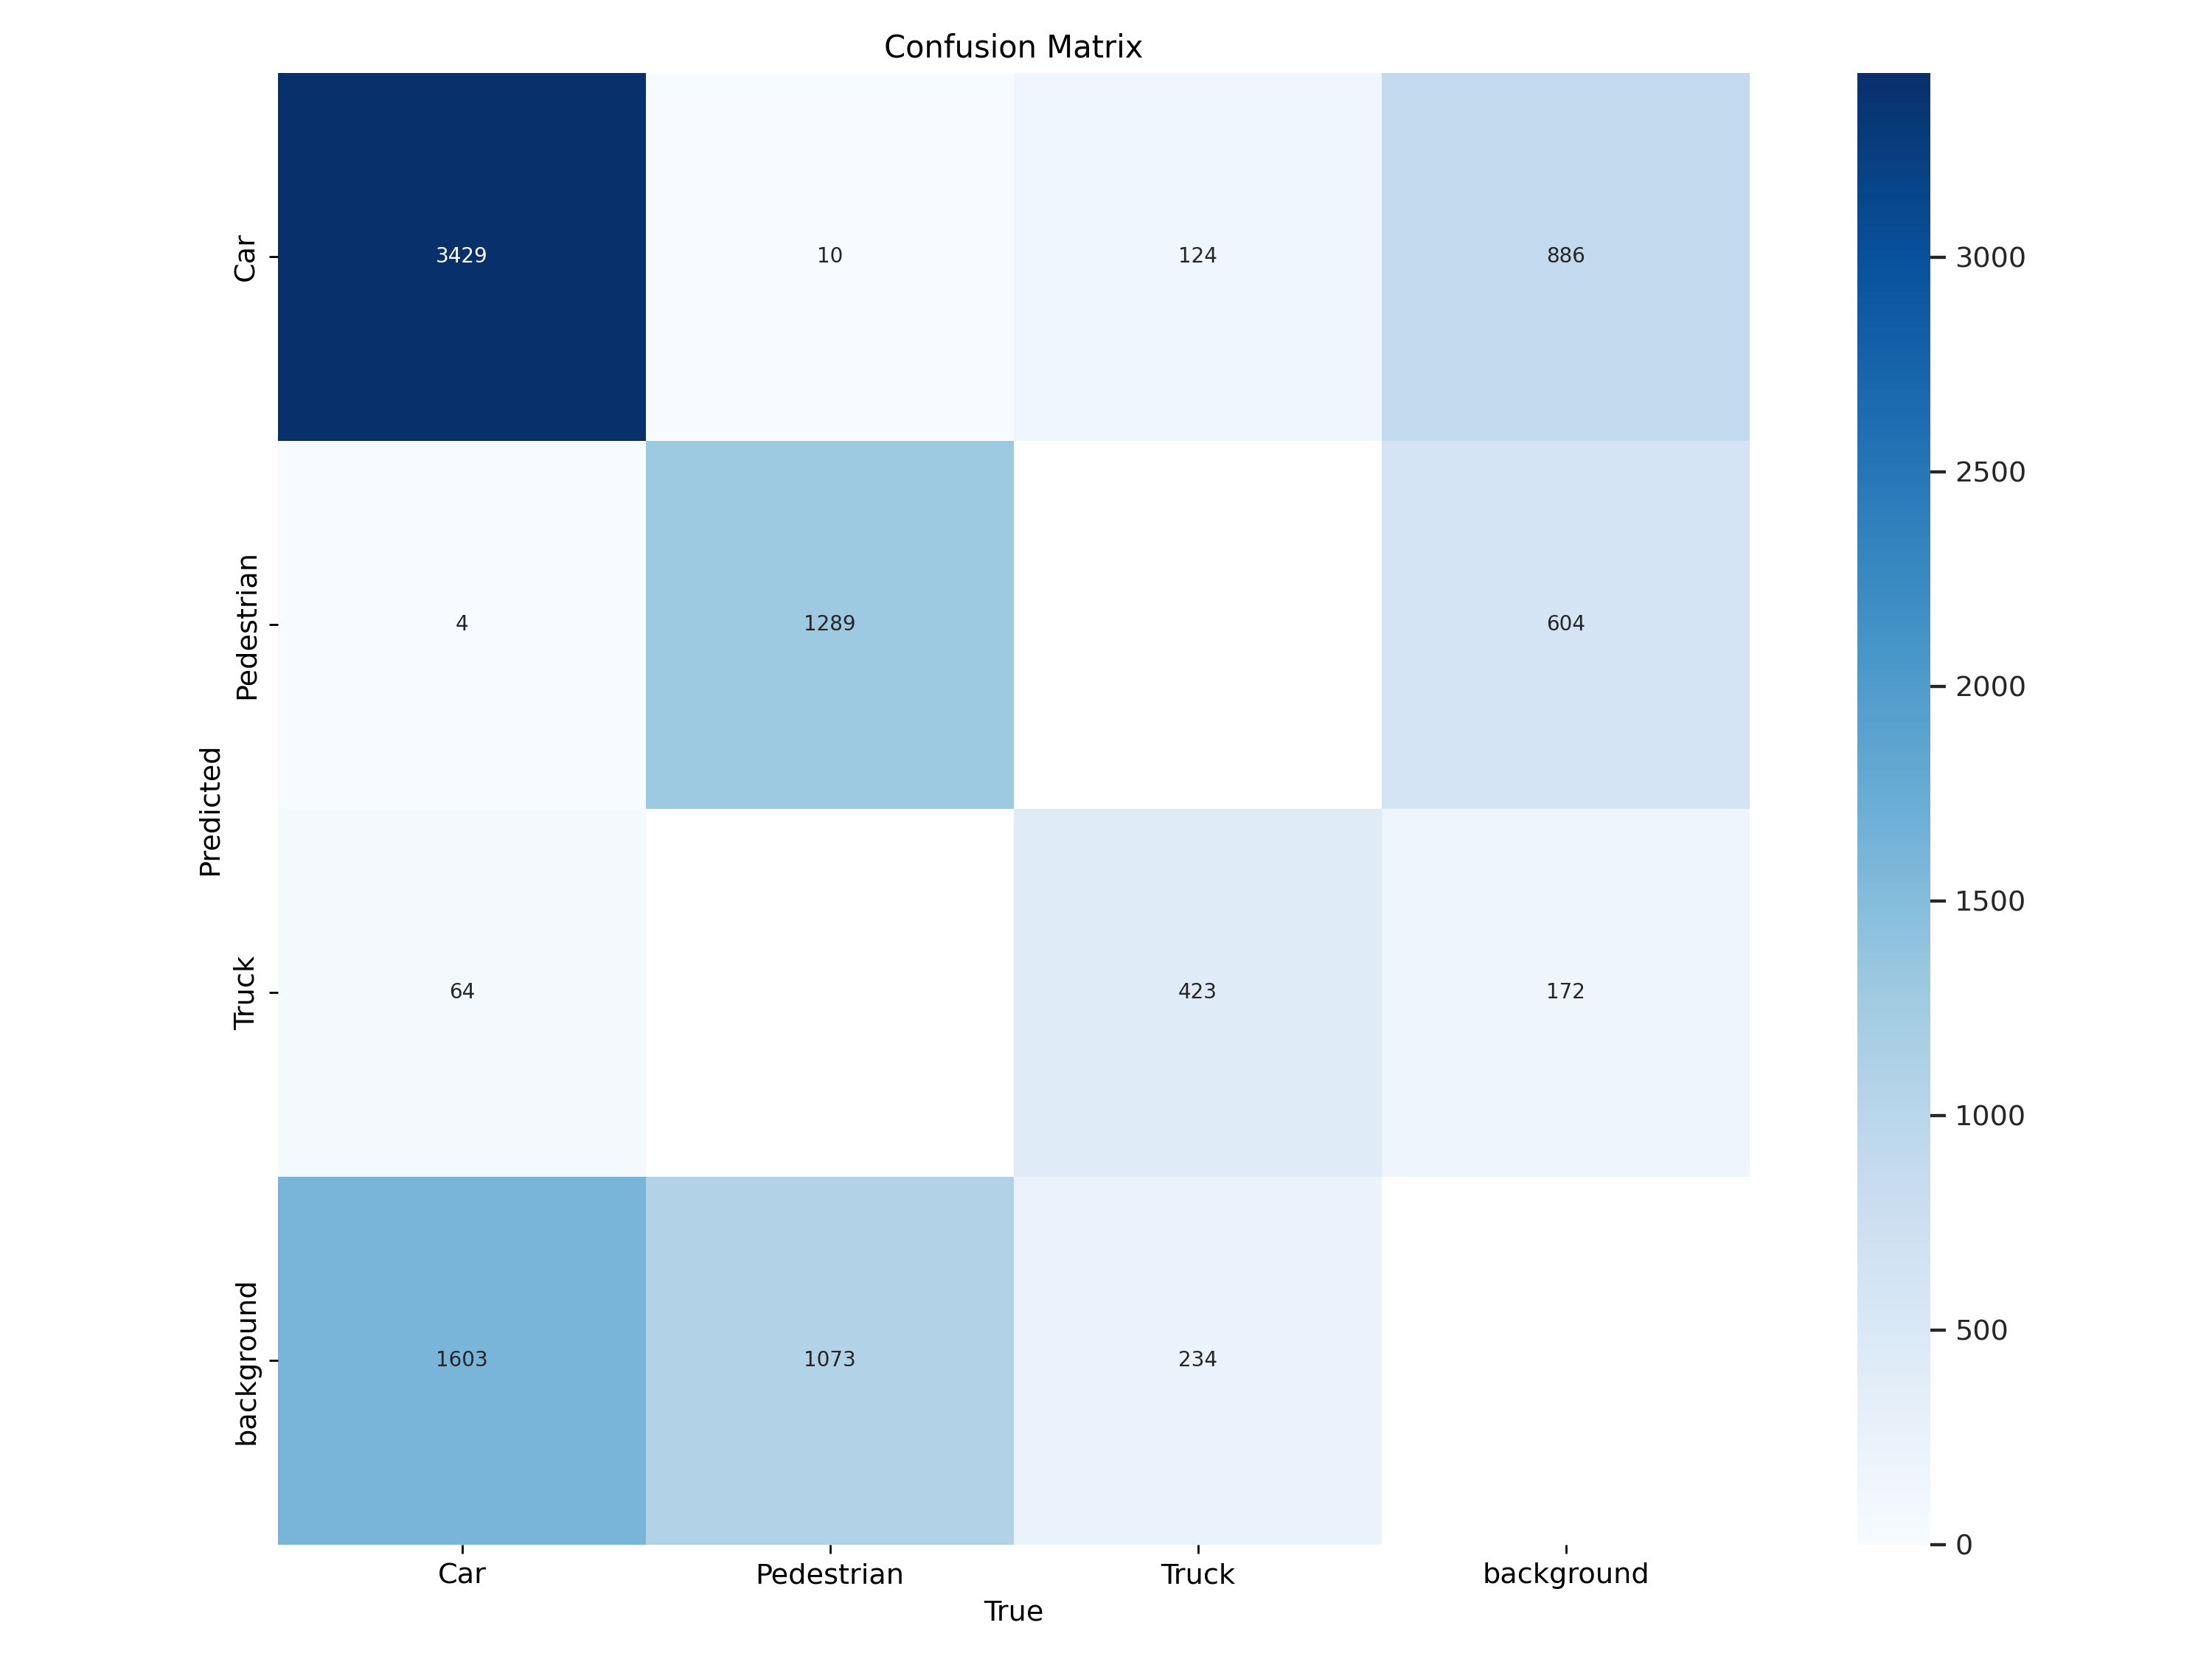

In [7]:
# confusion Matrix
Image(filename=f'/content/drive/MyDrive/objectdetection/runs/detect/train3/confusion_matrix.png', width=600)

/content


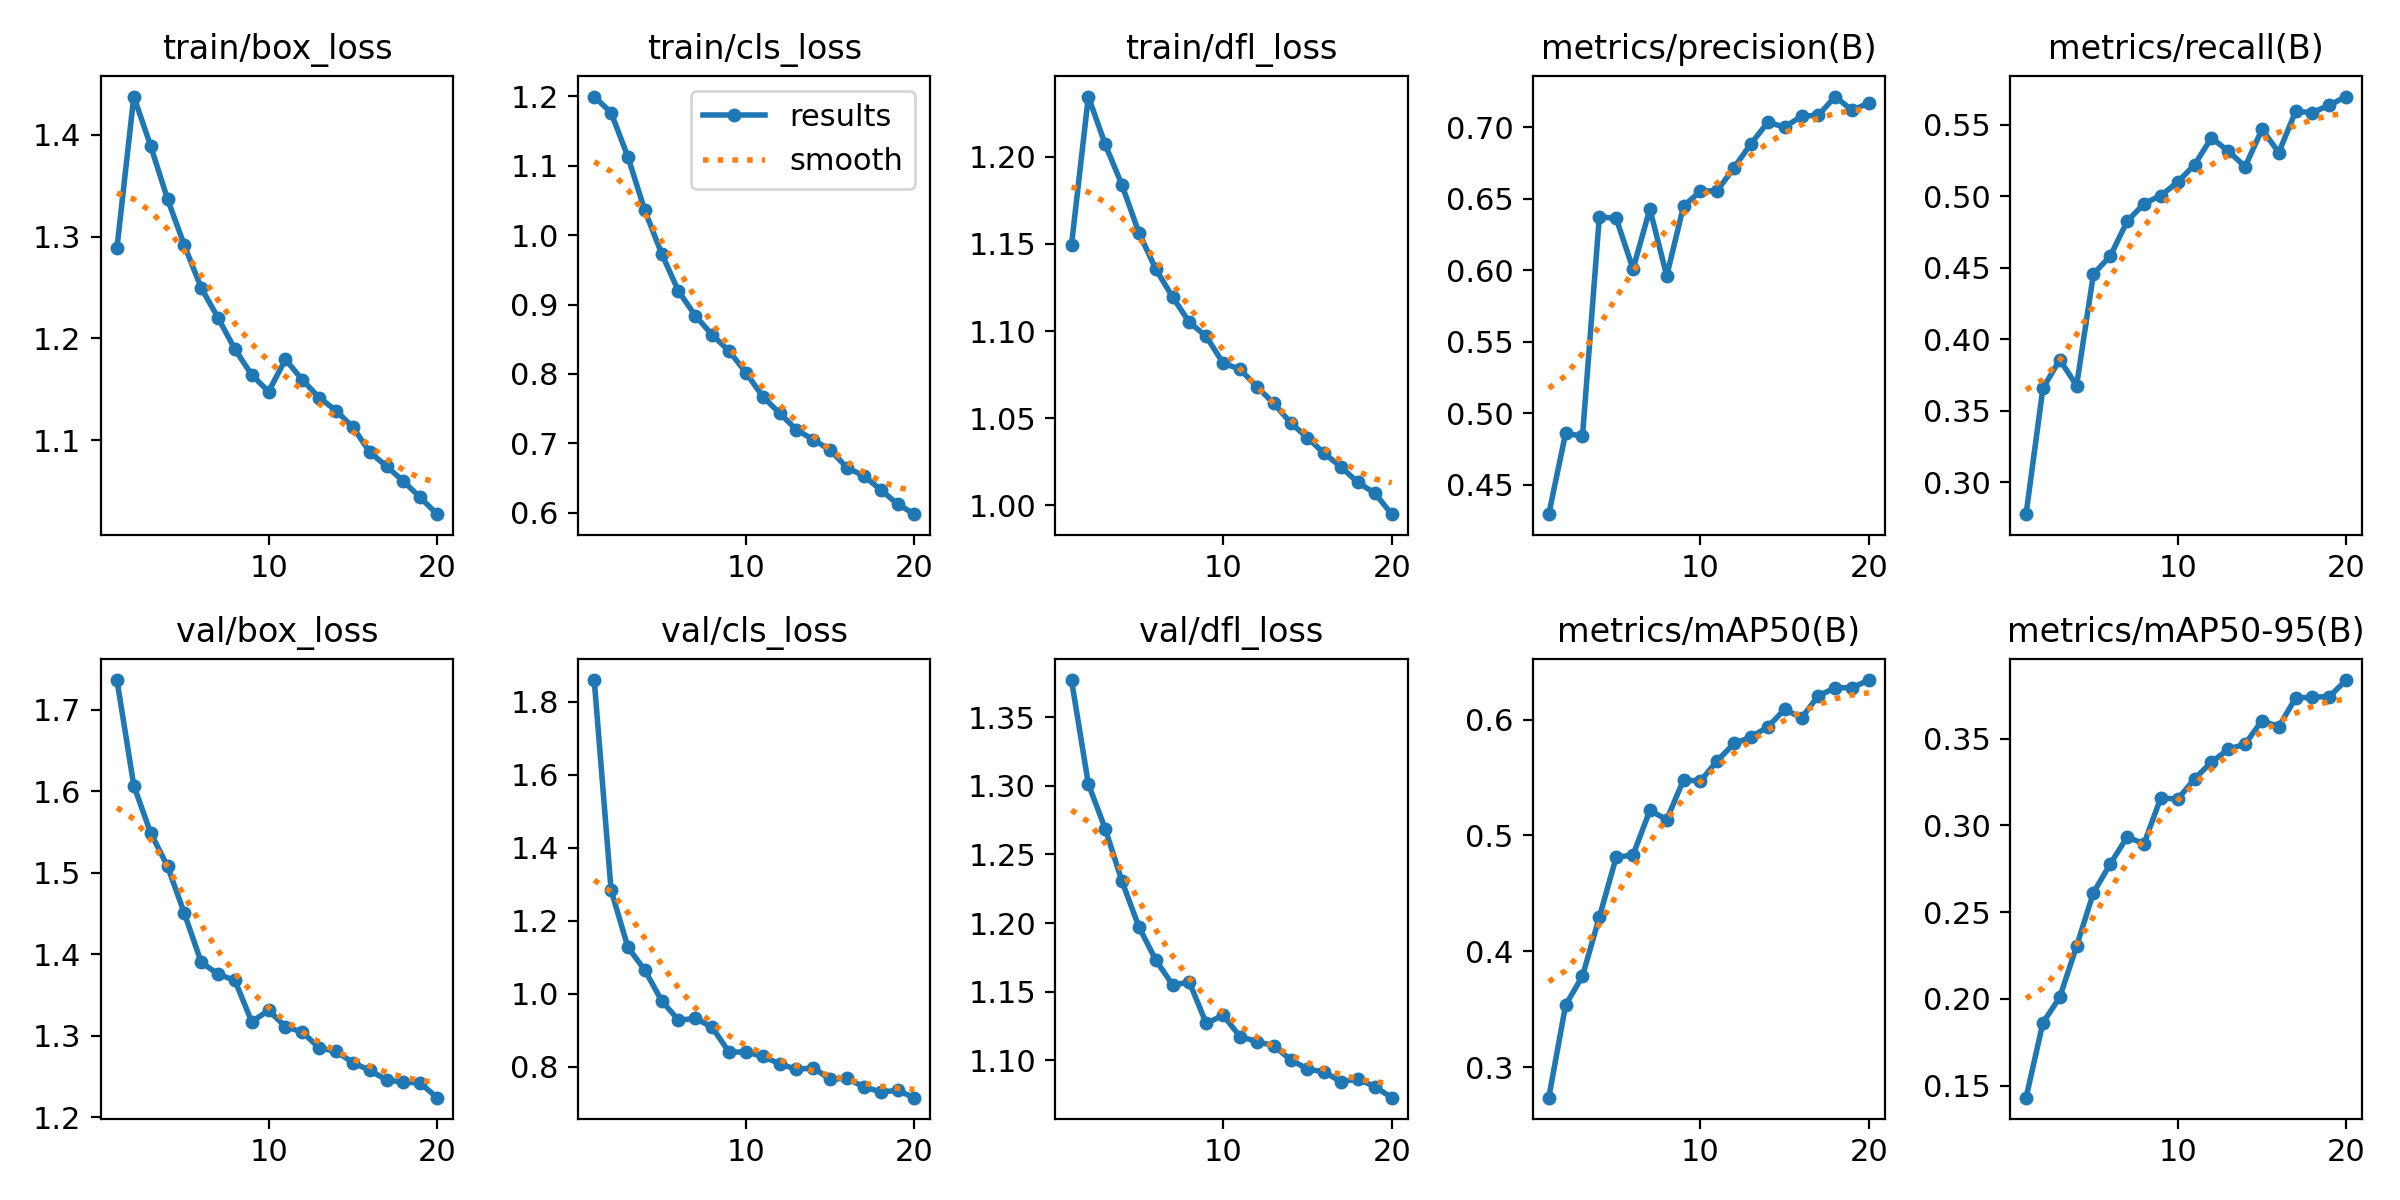

In [8]:
# loss
Image(filename='/content/drive/MyDrive/objectdetection/runs/detect/train3/results.png', width=600)

/content


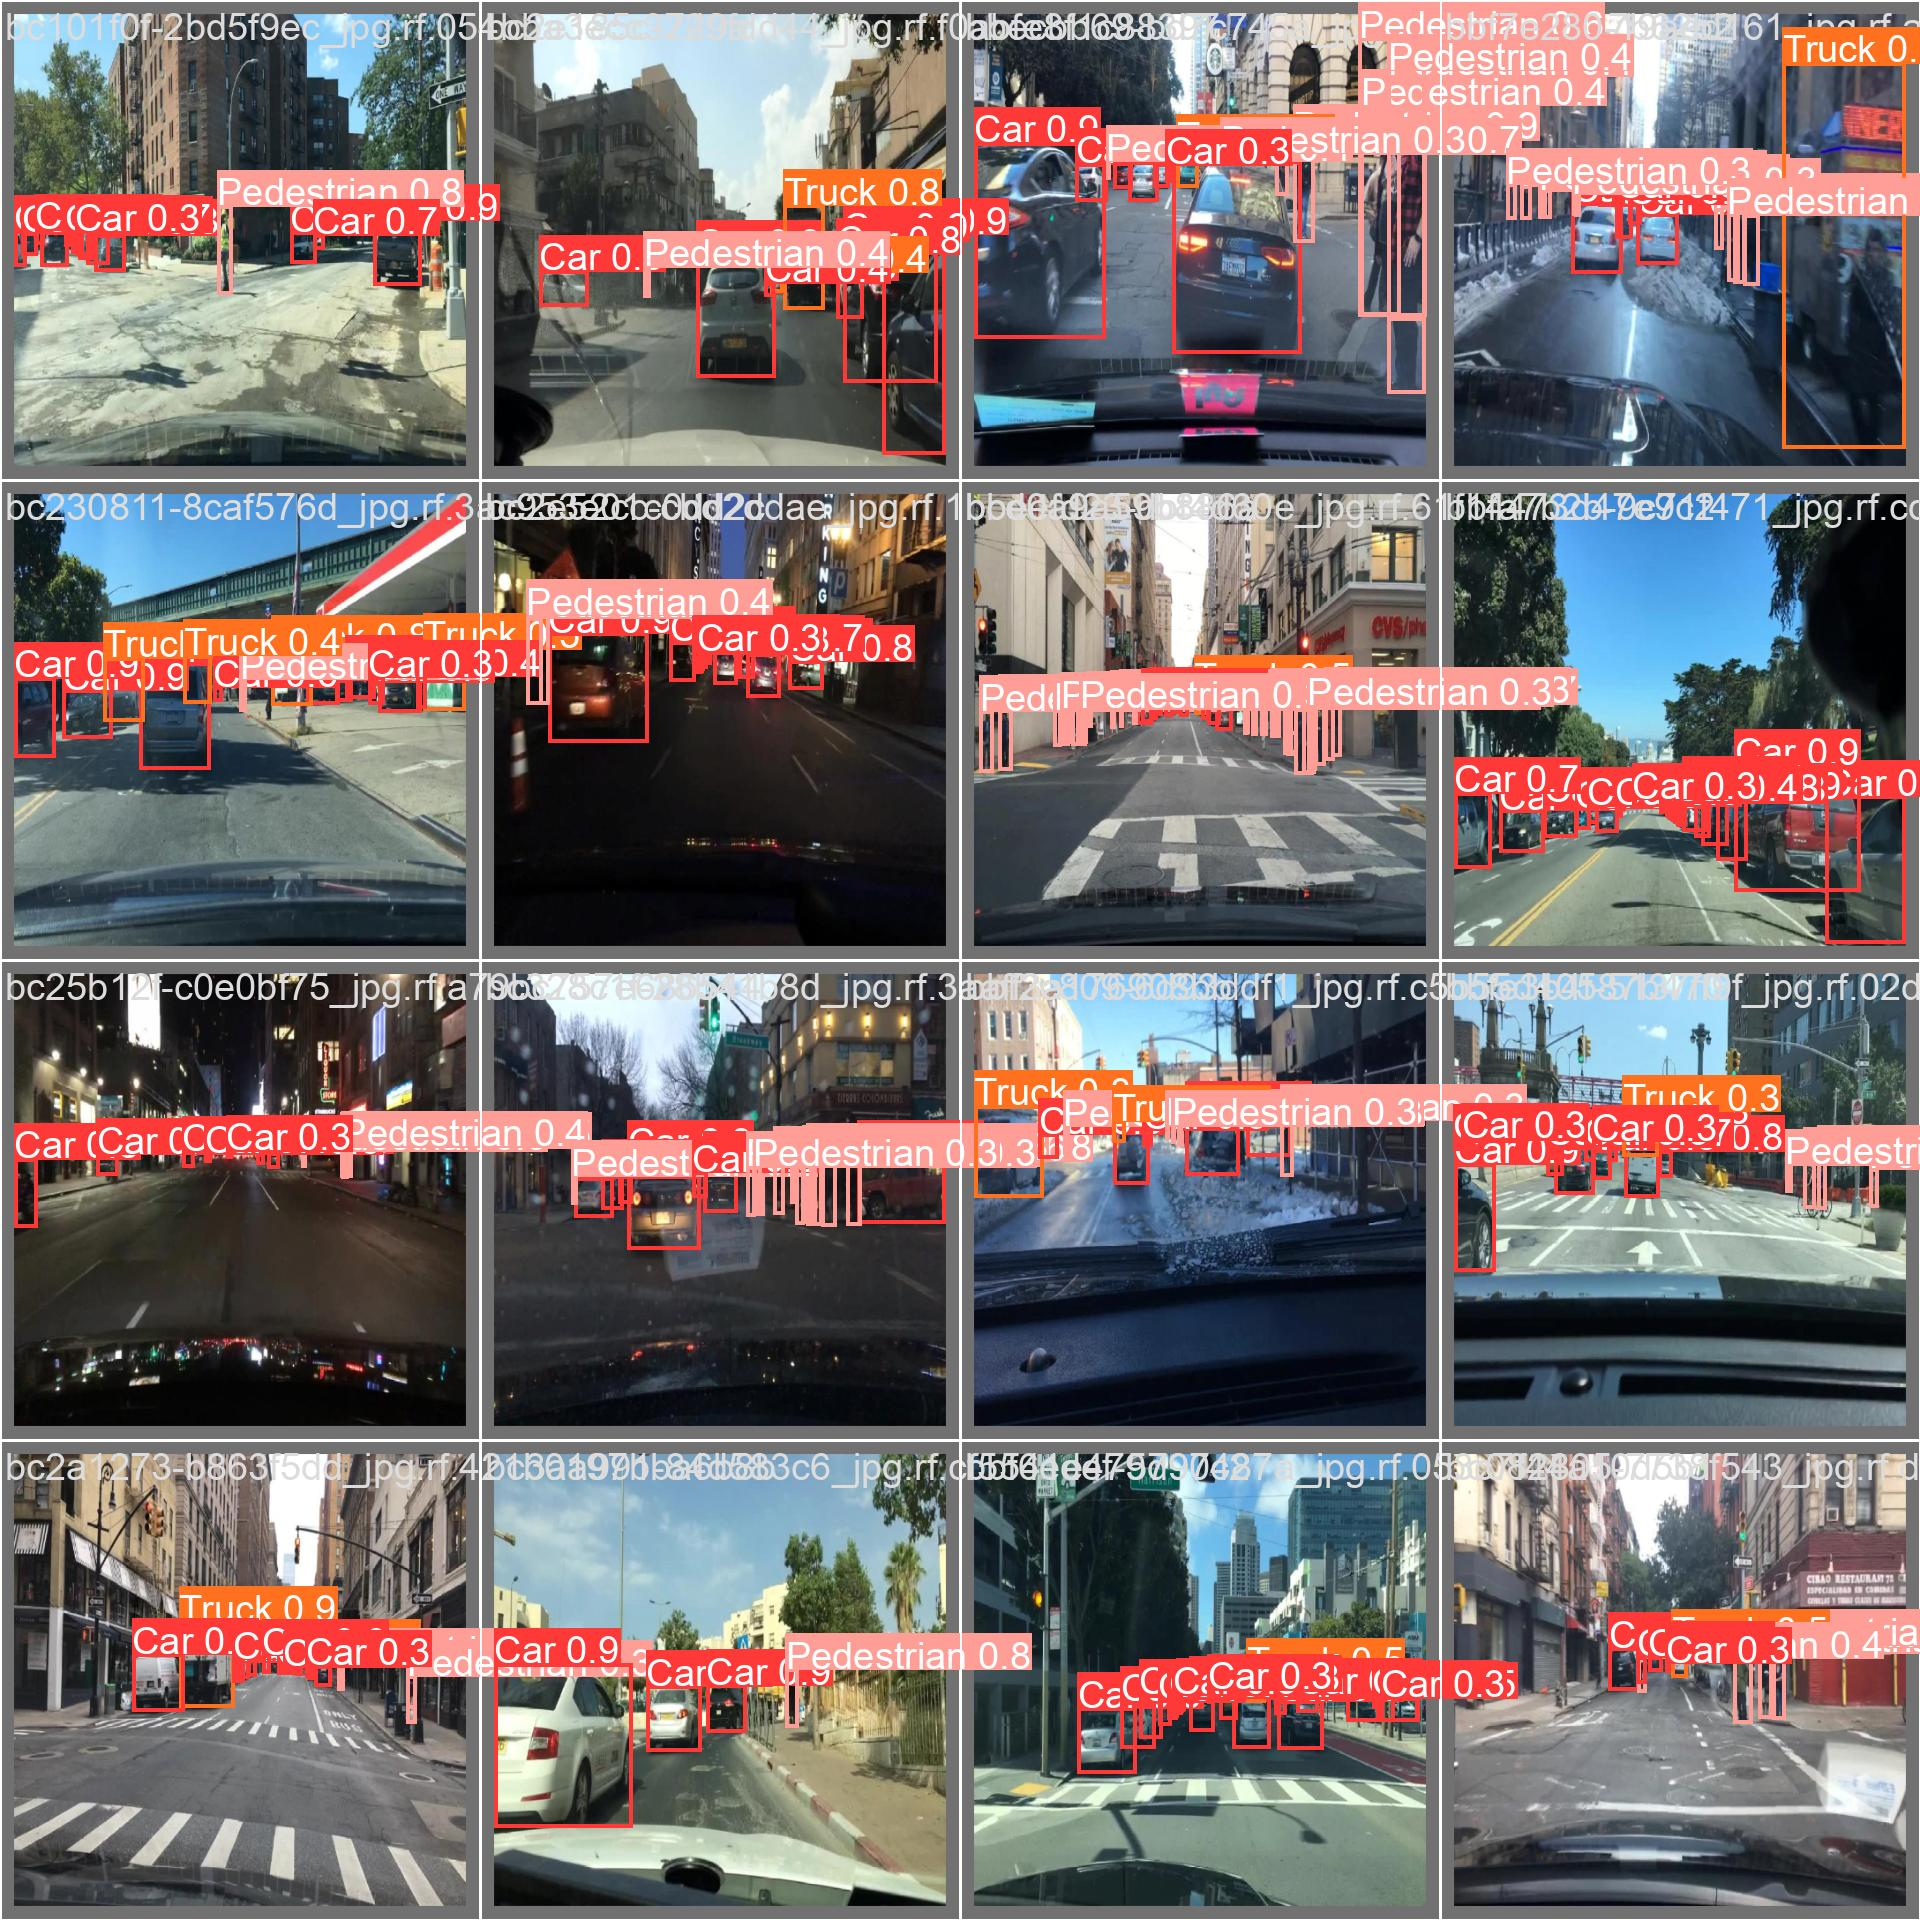

In [9]:
# prediction of trained model
Image(filename='/content/drive/MyDrive/objectdetection/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [11]:
# prediction using our trained model

!yolo task=detect mode=val model=/content/drive/MyDrive/objectdetection/runs/detect/train3/weights/best.pt data=/content/R+S_5k-5/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/R+S_5k-5/valid/labels.cache... 500 images, 0 backgrounds, 0 corrupt: 100% 500/500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  97% 31/32 [00:25<00:00,  2.32it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 32/32 [00:25<00:00,  1.25it/s]
                   all        500       8253      0.718       0.57      0.634      0.384
  

In [12]:

!yolo task=detect mode=predict model=/content/drive/MyDrive/objectdetection/runs/detect/train3/weights/best.pt conf=0.25 source=/content/R+S_5k-5/test/images/bcaf73c1-e0c7165a_jpg.rf.bdbfaea0f7b623a1f42445667cfda9df.jpg save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/R+S_5k-5/test/images/bcaf73c1-e0c7165a_jpg.rf.bdbfaea0f7b623a1f42445667cfda9df.jpg: 512x512 8 Cars, 2 Pedestrians, 2 Trucks, 42.4ms
Speed: 3.2ms preprocess, 42.4ms inference, 540.3ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [17]:

!yolo task=detect mode=predict model=/content/drive/MyDrive/objectdetection/runs/detect/train3/weights/best.pt conf=0.25 source=/content/R+S_5k-5/test/images/c0faa237-5724019d_jpg.rf.b7f9b90a0f244c02f994e6c0ad589a21.jpg save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/R+S_5k-5/test/images/c0faa237-5724019d_jpg.rf.b7f9b90a0f244c02f994e6c0ad589a21.jpg: 512x512 6 Cars, 1 Pedestrian, 1 Truck, 42.4ms
Speed: 3.1ms preprocess, 42.4ms inference, 824.0ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [13]:

!yolo task=detect mode=predict model=/content/drive/MyDrive/objectdetection/runs/detect/train3/weights/best.pt conf=0.25 source=/content/R+S_5k-5/test/images/bd355fcc-e43df88a_jpg.rf.fb786e0aa2e37d21f8ec13a5909314a8.jpg save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/R+S_5k-5/test/images/bd355fcc-e43df88a_jpg.rf.fb786e0aa2e37d21f8ec13a5909314a8.jpg: 512x512 5 Cars, 6 Pedestrians, 1 Truck, 42.4ms
Speed: 4.0ms preprocess, 42.4ms inference, 534.7ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


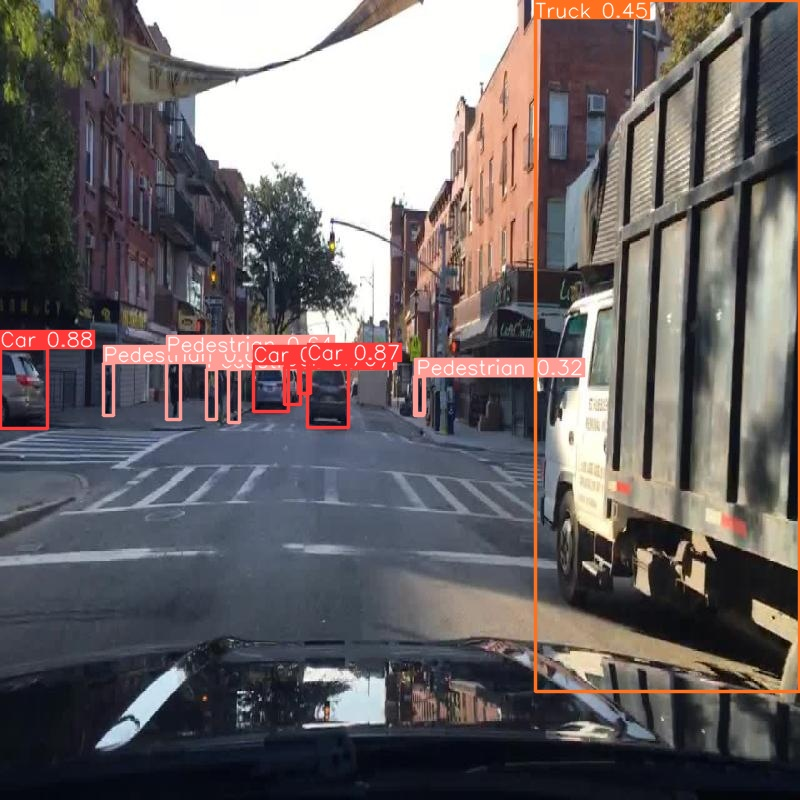

In [15]:
Image(filename='/content/runs/detect/predict2/bd355fcc-e43df88a_jpg.rf.fb786e0aa2e37d21f8ec13a5909314a8.jpg', width=600)

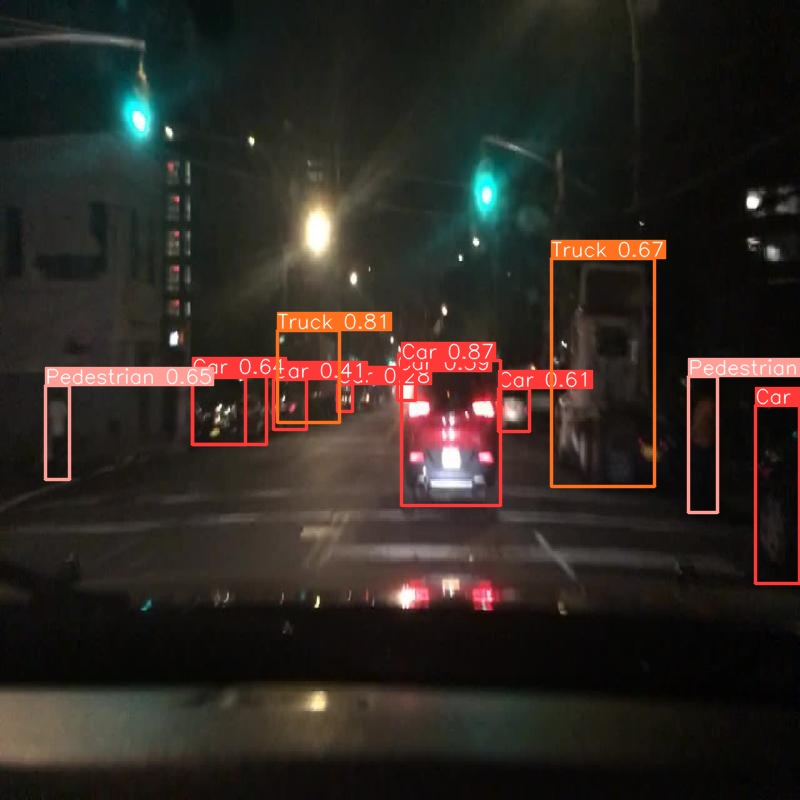

In [16]:
Image(filename='/content/runs/detect/predict/bcaf73c1-e0c7165a_jpg.rf.bdbfaea0f7b623a1f42445667cfda9df.jpg', width=600)

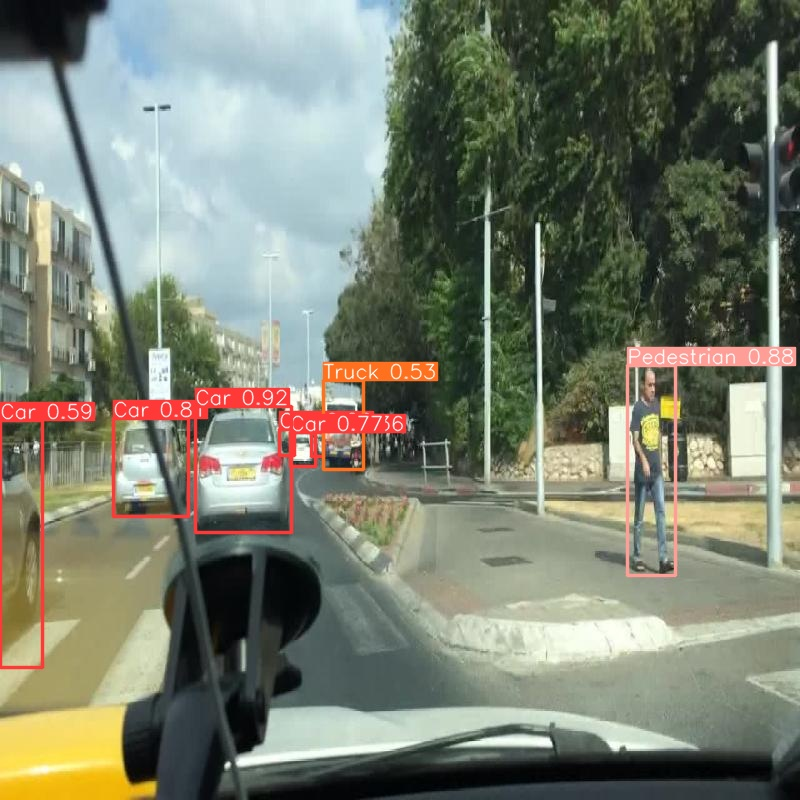

In [18]:
Image(filename='/content/runs/detect/predict3/c0faa237-5724019d_jpg.rf.b7f9b90a0f244c02f994e6c0ad589a21.jpg', width=600)